<a href="https://colab.research.google.com/github/Arrnv/Arrnv/blob/main/01_neutral_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to regression with neutral network in tensorflow

Predecting a numerical variable based on some other combination of variables,

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


### Creating the data to view and fit

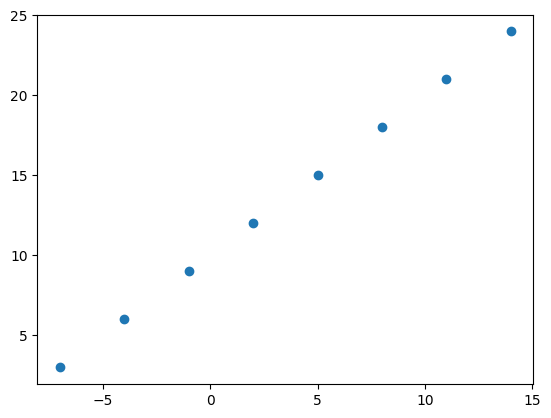

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# creation of features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X,Y)

In [4]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# Create a demo tensor for our housing prise problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_prise = tf.constant([939700])
house_info, house_prise

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], Y[0]

(-7.0, 3.0)

In [7]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
# Turning our numpy array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

# Set random.set_seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absulate error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochachastic greadent descent
              metrics=["mae"])
# 3. fit the model
model.fit(tf.expand_dims(X,axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 19.9698 - mae: 19.9698
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 19.6886 - mae: 19.6886
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 19.4073 - mae: 19.4073
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 19.1261 - mae: 19.1261
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 18.8448 - mae: 18.8448


In [10]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), ())

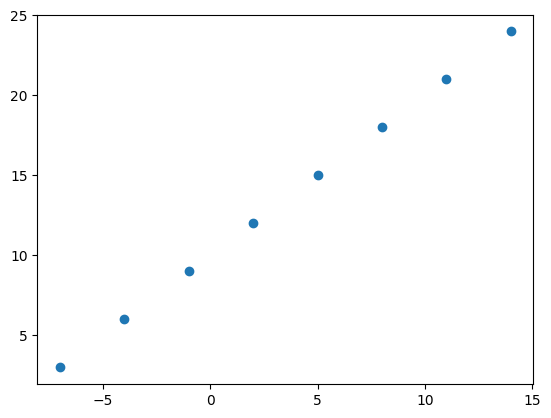

In [11]:
plt.scatter(X,Y)

## Steps in modelling with Tensorflow
1. Creating a model - defin theinput and output layers as well as the hidden layers of deep learning model.
2. compiling a model - define the loss function(in other words , the function which tells our model how wrong it is) and
the optimizer(tells our model how to improve the patterns its learning) and evaluate matrices ( what can we use to interpret the performance of our model).
3. Fitting a  model - letting the model try to find patterns between X & Y(features and ladels)

In [12]:

# Set random.set_seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absulate error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochachastic greadent descent
              metrics=["mae"])
# 3. fit the model
model.fit(tf.expand_dims(X,axis=-1), Y, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 593ms/step - loss: 12.9808 - mae: 12.9808
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 12.8483 - mae: 12.8483
Epoch 3/50
1/1 [==============================] - 0s 14ms/step - loss: 12.7158 - mae: 12.7158
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 12.5833 - mae: 12.5833
Epoch 5/50
1/1 [==============================] - 0s 14ms/step - loss: 12.4508 - mae: 12.4508
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 12.3183 - mae: 12.3183
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 12.1858 - mae: 12.1858
Epoch 8/50
1/1 [==============================] - 0s 14ms/step - loss: 12.0533 - mae: 12.0533
Epoch 9/50
1/1 [==============================] - 0s 17ms/step - loss: 11.9208 - mae: 11.9208
Epoch 10/50
1/1 [==============================] - 0s 24ms/step - loss: 11.7883 - mae: 11.7883
Epoch 11/50
1/1 [==============================] - 0s 14ms

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 125ms/step


array([[29.18687]], dtype=float32)

In [14]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 82ms/step


array([[29.18687]], dtype=float32)

In [15]:
y_pred + 17

array([[46.18687]], dtype=float32)

### Improving our model

We can improve our model , by altering the steps to create a mobel

1) **Createing a model** - here we might add more layers,
increasing the number of hidden units(all called neurons)
within each of the hidden layers, change the activation function of each layers,

2) **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of optimization function.

3) **Fitting a model** - Here we might fit a model for more **epochs**

In [16]:
# Set random.set_seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absulate error
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # sgd is short for stochachastic greadent descent
              metrics=["mae"])
# 3. fit the model
model.fit(tf.expand_dims(X,axis=-1), Y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 13.4158 - mae: 13.4158
Epoch 2/500
1/1 [==============================] - 0s 22ms/step - loss: 13.4113 - mae: 13.4113
Epoch 3/500
1/1 [==============================] - 0s 23ms/step - loss: 13.4068 - mae: 13.4068
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 13.4023 - mae: 13.4023
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 13.3978 - mae: 13.3978
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 13.3933 - mae: 13.3933
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 13.3888 - mae: 13.3888
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 13.3843 - mae: 13.3843
Epoch 9/500
1/1 [==============================] - 0s 18ms/step - loss: 13.3798 - mae: 13.3798
Epoch 10/500
1/1 [==============================] - 0s 15ms/step - loss: 13.3753 - mae: 13.3753
Epoch 11/500
1/1 [==============================] -

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 229ms/step


array([[9.409022]], dtype=float32)

In [18]:
# Set random.set_seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absulate error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochachastic greadent descent
              metrics=["mae"])
# 3. fit the model
model.fit(tf.expand_dims(X,axis=-1), Y, epochs=50)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 13.3037 - mae: 13.3037
Epoch 2/50
1/1 [==============================] - 0s 15ms/step - loss: 12.9517 - mae: 12.9517
Epoch 3/50
1/1 [==============================] - 0s 15ms/step - loss: 12.5965 - mae: 12.5965
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 12.2151 - mae: 12.2151
Epoch 5/50
1/1 [==============================] - 0s 14ms/step - loss: 11.7902 - mae: 11.7902
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 11.3148 - mae: 11.3148
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 10.7557 - mae: 10.7557
Epoch 8/50
1/1 [==============================] - 0s 16ms/step - loss: 10.0738 - mae: 10.0738
Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 9.2059 - mae: 9.2059
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 8.0793 - mae: 8.0793
Epoch 11/50
1/1 [==============================] - 0s 14ms/step -

In [19]:
# model

# 1 creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# fitting the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.5133 - mae: 13.5133
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2042 - mae: 13.2042
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9259 - mae: 12.9259
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6609 - mae: 12.6609
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 12.4019 - mae: 12.4019
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1517 - mae: 12.1517
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8951 - mae: 11.8951
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6281 - mae: 11.6281
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3529 - mae: 11.3529
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0641 - mae: 11.0641
Epoch 11/100
1/1 [==============================] -

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[31.69008]], dtype=float32)

In [21]:
# Lets create a new model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 827ms/step - loss: 12.3194 - mae: 12.3194
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5924 - mae: 11.5924
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8546 - mae: 10.8546
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1045 - mae: 10.1045
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3390 - mae: 9.3390
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5551 - mae: 8.5551
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.7500 - mae: 7.7500
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9208 - mae: 6.9208
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8973 - mae: 6.8973
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.2415 - mae: 7.2415
Epoch 11/100
1/1 [==============================] - 0s 10ms/ste

In [22]:
model.predict([17.0])

1/1 [==============================] - 0s 59ms/step


array([[26.718489]], dtype=float32)

## Evaluting a Model

In [3]:
# Lets make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [4]:
# Lets make the labels
Y = X+ 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

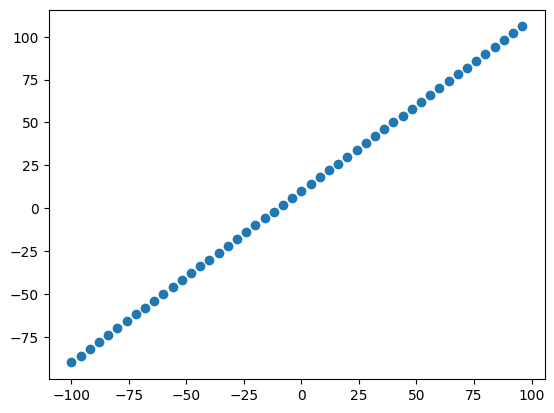

In [5]:
# Lets visualize
import matplotlib.pyplot as plt
plt.scatter(X,Y);

## the 3 stets

In [6]:
len(X)

50

In [15]:
# Lets split the data into train test data sets
x_train = X[:40]
x_test = X[40:]
y_train = Y[:40]
y_test = Y[40:]
len(x_test)

10

In [19]:
# Lets look how to make a nural network for our data

# 1. Create Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Lets compile the model
model1.compile(loss=tf.keras.losses.mae, # mae = mean absulate error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochachastic greadent descent
              metrics=["mae"])

#Lets fit the model on training data set
model1.fit(tf.expand_dims(x_train,axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 30ms/step - loss: 39.8950 - mae: 39.8950
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 11.3289 - mae: 11.3289
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 12.7981 - mae: 12.7981
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 12.6793 - mae: 12.6793
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1500 - mae: 9.1500
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.2300 - mae: 9.2300
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 7.8368 - mae: 7.8368
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.5908 - mae: 11.5908
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 8.9066 - mae: 8.9066
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 9.1431 - mae: 9.1431
Epoch 11/100
2/2 [==============================] - 0s 7ms/ste

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [10]:
model.fit(x_train,y_train,epochs=100,verbose=0)

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


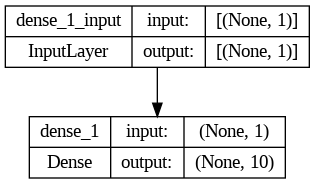

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualizing our model pridiction

In [20]:
y_preds = model1.predict(x_test)

y_preds

1/1 [==============================] - 0s 39ms/step


array([[ 68.352806],
       [ 72.819954],
       [ 77.2871  ],
       [ 81.75424 ],
       [ 86.22139 ],
       [ 90.68854 ],
       [ 95.15568 ],
       [ 99.622826],
       [104.08997 ],
       [108.55711 ]], dtype=float32)

In [17]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [24]:
# Lets create a ploting function
def plot_prediction(train_data=x_train,
                    train_labels=y_train,
                    test_data = x_test,
                    test_labels=y_test,
                    prediction = y_preds):
  """
  Plots traning data , testing data and comparing prediction to ground truth labels
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label = "Traning data")
  plt.scatter(test_data, test_labels, c="g", label = "Testing data")
  plt.scatter(test_data, prediction, c="r", label = "Predictions")
  plt.legend();


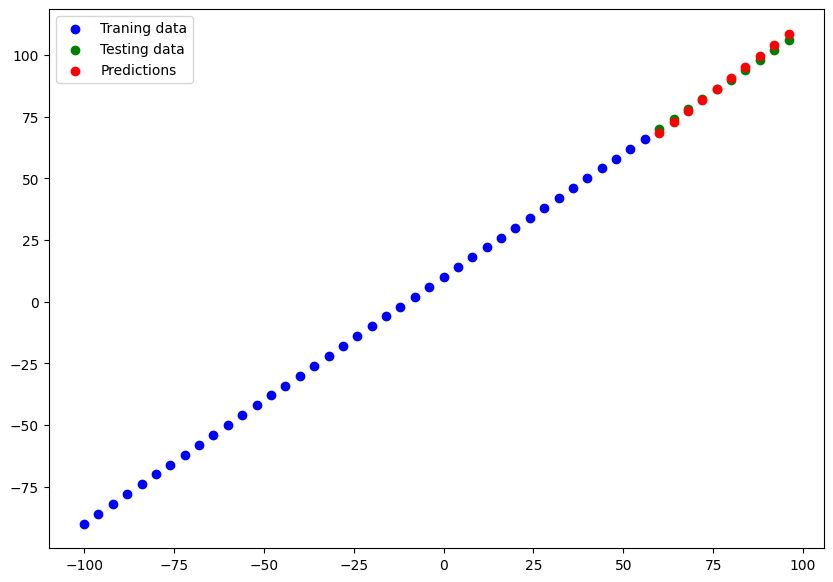

In [25]:
plot_prediction()

In [29]:
#Calculating mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_preds))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.2121414>

In [31]:
def mae(y_true, y_preds):
  return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)

def mse(y_true, y_preds):
  return tf.merics.mean_squared_error(y_true=y_test, y_pred=y_preds)